<!--NAVIGATION-->
# < [Autograd](2_Autograd.ipynb) | Regression | [Digit-Classification-MLP](4_MLP_Digit_Classification.ipynb)>

## Deep Learning with PyTorch Step-by-Step: A Beginner's Guide
### Regression, Vecotrized Form
### Least Mean Square (LMS), Normal Equation, Closed Form
<div dir="rtl">
در بخش رگرسیون شیوه‌ی استفاده از الگوریتم گرادیان کاهشی به صورتهای مختلف برای رگرسیون ملاحظه شد.
در این بخش ابتدا پارامتر b را حذف می‌کنیم که فقط  w را به صورت برداری داشته باشیم و مشابه مطالب آموزشی باشد.

همچنین با استفاده از روش معادلات نرمال مسأله کمترین مربعات خطا را حل خواهیم کرد.
</div>

اگر در گوکل کولب اجرا می‌کنید، دو دستور زیر را از حالت توضیح خارج کنید

In [23]:
# !git clone https://github.com/mamintoosi-cs/pytorch-workshop.git
# %cd pytorch-workshop


In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
# This is needed to render the plots
from plots.utils import *
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='once')


# Vecotrized Form
## SSE

### Model

$$
\Large 
\begin{aligned}
y &= b + w x + \epsilon\\
&= w_0 x_0+ w_1 x_1 + \epsilon
\\
&\textrm{where:}\\
&x_0 = 1
\end{aligned}
$$

If the parameters shown by $\beta$:
$$
\large 
\begin{aligned}
\hat{y} = \beta_0 x_0+ \beta_1 x_1\\
\end{aligned}
$$
If $i^{th}$ instance is shown by $\mathbf{x}_i$
$$
\large 
\begin{aligned}
\hat{y}_i = \beta_0 \mathbf{x}_{i,0}+ \beta_1 \mathbf{x}_{i,1} 
\end{aligned}
$$
Sum of Squared Error (SSE):
$$
\begin{aligned}
\textrm{SSE} &= \sum_{i=1}^n{error_i}^2
\\
&= \sum_{i=1}^n{(\hat{y_i} - y_i)}^2
\\
&= \sum_{i=1}^n{(\beta_0 \mathbf{x}_{i,0} + \beta_1 \mathbf{x}_{i,1} - y_i)}^2\\
&= \sum_{i=1}^n{(\beta^T\mathbf{x}_{i} - y_i)}^2
= \sum_{i=1}^n{(\mathbf{x}_{i}^T\beta - y_i)}^2\\
&= ||X\beta - y||_2^2 = (X\beta - y)^T(X\beta - y)
\end{aligned}
$$
where:
$$
X = \begin{bmatrix}
    \mathbf{x_1}^T       \\
    \mathbf{x_2}^T   \\
    \vdots \\
    \mathbf{x_n}^T
\end{bmatrix} 
$$

## Data Generation

### Synthetic Data Generation

In [25]:
true_w0 = 1
true_w1 = 2
N = 100

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)

epsilon = (.1 * np.random.randn(N, 1))
y = true_w0 + true_w1 * x + epsilon

# Add a column of 1s to x

# ones = np.ones((N, 1))
# x = np.concatenate([ones, x],axis=1)
x = np.insert(x, 0, 1, axis=1)
print(x.shape)
print(x[:3])


(100, 2)
[[1.         0.37454012]
 [1.         0.95071431]
 [1.         0.73199394]]


In [26]:
y[:3]


array([[1.75778494],
       [2.87152788],
       [2.47316396]])

## Normal Equations, Closed Form Solution

We have to minimize: $||X\beta-y||_2^2$
$$
\begin{aligned}
SSE&=||X\beta-y||_2^2 = (X\beta-y)^T(X\beta-y)\\
&=((X\beta)^T-y^T)(X\beta-y) =(\beta^TX^T-y^T)(X\beta-y) \\
&=\beta^TX^T X\beta - \beta^T X^Ty -y^TX\beta + y^Ty\\
&=\beta^T M\beta - (X\beta)^Ty -y^TX\beta + y^Ty \qquad {(M=X^T X)}\\
&=\beta^T M\beta - 2y^TX\beta + y^Ty \qquad\qquad{(A^TB=B^TA)}\\
&=\beta^T M\beta - 2z^T\beta + y^Ty \qquad\qquad{(z^T=y^TX, z=X^Ty)}
\end{aligned}
$$
We Know that (See <a href="https://en.wikipedia.org/wiki/Matrix_calculus">Wikipedia: Matrix Calculus</a>):
$$\frac{\partial y^Tx}{\partial x}=\frac{\partial x^Ty}{\partial x}=y$$ 
$$\frac{\partial Mx}{\partial x}=M$$ 
 and if $M$ be a symmetric matrix:
$$\frac{\partial x^TMx}{\partial x}=2Mx$$
Hence:
$$
\begin{aligned}
\frac{\partial SSE}{\partial \beta} &= \frac{\partial (\beta^T M\beta - 2z^T\beta + y^Ty)}{\partial \beta} \\
&= 2M\beta-2z = 2X^TX\beta-2X^T y 
\end{aligned}
$$
Set the derivative equal to zero:
$$
\begin{aligned}
&\frac{\partial SSE}{\partial \beta}=0 \\
\Rightarrow & 2 X^TX\beta - 2X^T y = 0\\
\Rightarrow & X^TX\beta = X^Ty \\
\Rightarrow & \beta = (X^TX)^{-1}X^Ty \\
\end{aligned}
$$

In [27]:
X = x.copy()


In [28]:
w = np.linalg.inv(X.T@X)@X.T@y
w


array([[1.02150962],
       [1.95402268]])

## Regression
### Train-Validation-Test Split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [30]:
x_train.shape, y_train.shape


((80, 2), (80, 1))

(<Figure size 864x432 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Generated Data - Train'}, xlabel='x', ylabel='y'>,
        <AxesSubplot:title={'center':'Generated Data - Test'}, xlabel='x', ylabel='y'>],
       dtype=object))

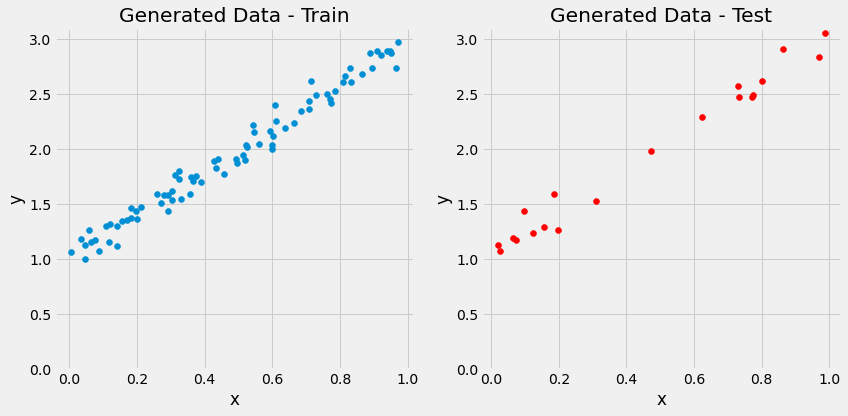

In [31]:
figure1(x_train, y_train, x_test, y_test)


## Step 0: Random Initialization

In [32]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)
w = np.random.randn(2, 1)

print(w)


[[ 0.49671415]
 [-0.1382643 ]]


## Step 1: Compute Model's Predictions

In [33]:
# Step 1 - Computes our model's predicted output - forward pass
# y_hat = b + w * x_train
y_hat = w[0] + w[1] * x_train[:, 1]
y_hat[:3]


array([0.39881299, 0.41404593, 0.36925186])

In [34]:
y_hat = x_train@w
y_hat[:3]


array([[0.39881299],
       [0.41404593],
       [0.36925186]])

(<Figure size 432x432 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

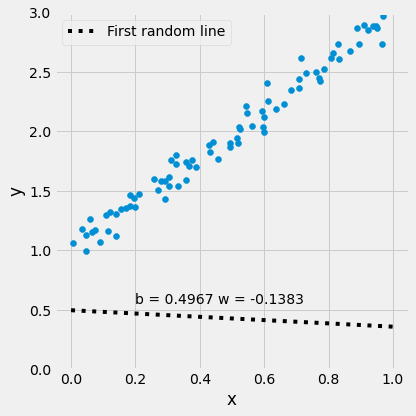

In [35]:
figure2(x_train, y_train, w[0], w[1])


## Step 2: Compute the Loss

$$
\Large
\begin{aligned}
 error_i &= \hat{y_i} - y_i\\
where:\\
y &= truew_0 + truew_1 x_1 + \epsilon\\
&\hat{y}= w_0 x_0+ w_1 x_1
\end{aligned}
$$

[2.36596945] [0.39881299]


(<Figure size 432x432 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

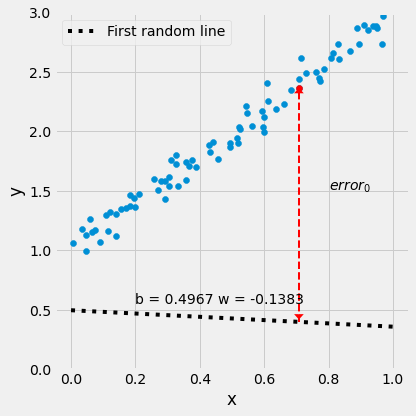

In [36]:
print(y_train[0], y_hat[0])
figure3(x_train, y_train, w[0], w[1])


$$
\Large
\begin{aligned}
MSE &= \frac{1}{n} \sum_{i=1}^n{error_i}^2
\\
&= \frac{1}{n} \sum_{i=1}^n{(\hat{y_i} - y_i)}^2
\\
&= \frac{1}{n} \sum_{i=1}^n{(w_0 \mathbf{x}_{i,0} + w_1 \mathbf{x}_{i,1} - y_i)}^2
\end{aligned}
$$

In [37]:
# Step 2 - Computing the loss
# We are using ALL data points, so this is BATCH gradient
# descent. How wrong is our model? That's the error!
error = (y_hat - y_train)
print(error.shape)
# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()
print(loss)


(80, 1)
2.6401126993616817


### Loss Surface

In [38]:
w0s, w1s, all_losses = mesh_losses(true_w0, true_w1, x_train, y_train)


(<Figure size 864x432 with 2 Axes>,
 (<Axes3DSubplot:title={'center':'Loss Surface'}, xlabel='b', ylabel='w'>,
  <AxesSubplot:title={'center':'Loss Surface'}, xlabel='b', ylabel='w'>))

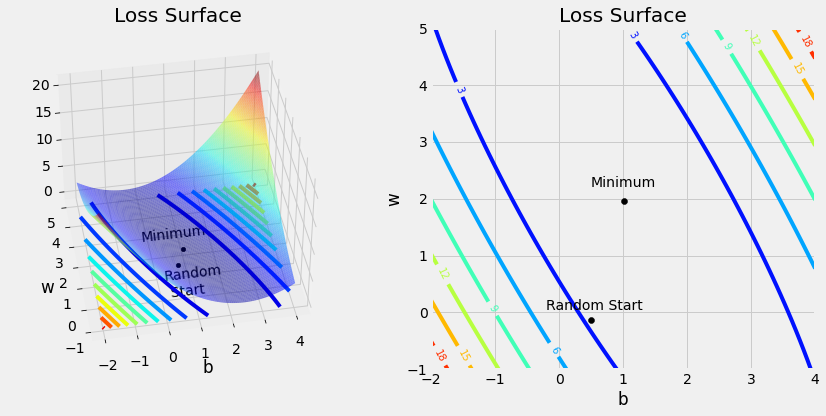

In [39]:
figure4(x_train, y_train, w[0], w[1], w0s, w1s, all_losses)


## Step 3: Compute the Gradients

$$
\large
\begin{aligned}
\frac{\partial{MSE}}{\partial{w_j}} &= \frac{\partial{}}{\partial{w_j}}\frac{1}{n} \big(\sum_{i=1}^n{error_i}^2\big) =\frac{1}{n} \sum_{i=1}^n{\frac{\partial{error_i^2}}{\partial{w_j}}}
\\
&= \frac{1}{n} \sum_{i=1}^n{\frac{\partial{{(\hat{y_i} - y_i)}^2}}{\partial{w_j}}}
\\
&= \frac{1}{n} \sum_{i=1}^n{2\frac{\partial{(\hat{y_i} - y_i)}}{\partial{w_j}}
(\hat{y_i} - y_i)}\\
&= \frac{1}{n} \sum_{i=1}^n{2\frac{\partial{(\hat{y_i} - y_i)}}{\partial{\hat{y_i}}} \cdot \frac{\partial{\hat{y_i}}}{\partial{w_j}}
(\hat{y_i} - y_i)}
\\
&= 2 \frac{1}{n} \sum_{i=1}^n{\mathbf{x}_{i,j} (\hat{y_i} - y_i)}= 2 \frac{1}{n} \sum_{i=1}^n{\mathbf{x}_{i,j} error_i}
\end{aligned}
$$

In [40]:
# Step 3 - Computes gradients for both "b" and "w" parameters
w0_grad = 2 * error.mean()
# w1_grad = 2 * (x_train[:,1] * error).mean() # Wrong!
w1_grad = 2 * (np.delete(x_train, 0, axis=1) * error).mean()
print(w0_grad, w1_grad)


-3.0224384959608583 -1.7706733515907813


In [41]:
(x_train * error).shape


(80, 2)

Vectorized form

In [42]:
# w_grad = 2 * (x_train * error).mean() # Wrong
w_grad = 2 * (x_train * error).mean(axis=0)
print(w_grad.shape, w_grad)
w_grad = np.reshape(w_grad, (2, 1))
print(w_grad.shape, w_grad)


(2,) [-3.0224385  -1.77067335]
(2, 1) [[-3.0224385 ]
 [-1.77067335]]


### Visualizing the Gradients
For more details about gradient descent see github: dvgodoy/PyTorchStepByStep

### Backpropagation

## Step 4: Update the Parameters

$$
\Large
\begin{aligned}
& b = b - \eta \frac{\partial{MSE}}{\partial{b}}
\\
& w = w - \eta \frac{\partial{MSE}}{\partial{w}}
\end{aligned}
$$

In [43]:
print(w.shape, w_grad.shape)


(2, 1) (2, 1)


In [44]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1
print(w[0], w[1])

# Step 4 - Updates parameters using gradients and the
# learning rate
# w[0] = w[0] - lr * w0_grad
# w[1] = w[1] - lr * w1_grad
w = w - lr * w_grad

print(w)
print(w[0])


[0.49671415] [-0.1382643]
[[0.798958  ]
 [0.03880303]]
[0.798958]


(<Figure size 432x432 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

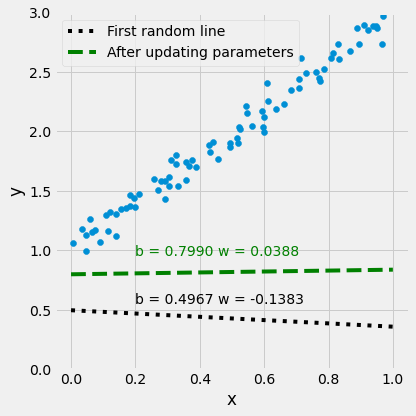

In [45]:
figure9(x_train, y_train, w[0], w[1])


## Step 5: Repeat the above updating!

In [46]:
# Initializes parameters "b" and "w" randomly
np.random.seed(42)
w = np.random.randn(2, 1)
lr = 0.3
num_epochs = 50
Losses = np.empty(num_epochs)
for epoch in range(num_epochs):
    y_hat = x_train@w
    error = (y_hat - y_train)
    loss = (error ** 2).mean()
    Losses[epoch] = loss
    w_grad = 2 * (x_train * error).mean(axis=0)
    w_grad = np.reshape(w_grad, (2, 1))
    w = w - lr * w_grad

w


array([[1.11648206],
       [1.75056848]])

(<Figure size 432x432 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

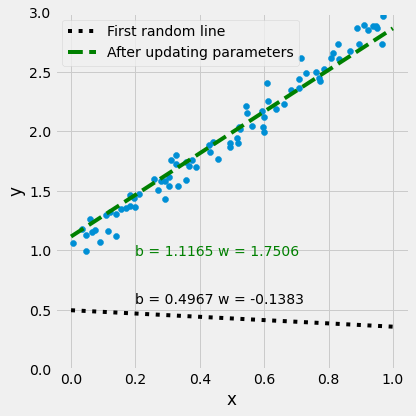

In [47]:
figure9(x_train, y_train, w[0], w[1])


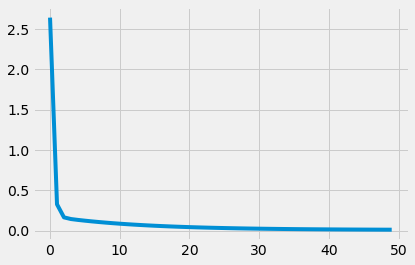

In [48]:
plt.plot(Losses)


## Using PyTorch auto grad

In [49]:
import torch
from torch import autograd
# Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

b = torch.tensor(b, requires_grad=True)
w = torch.tensor(w, requires_grad=True)
xTrain = torch.tensor(x_train)  # xTrain is a pyTorch Tensor
yTrain = torch.tensor(y_train)  # yTrain is a pyTorch Tensor


## Backward

Differntiationg using backward function

https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

In [50]:
np.random.seed(42)
w = np.random.randn(2, 1)

w = torch.tensor(w, requires_grad=True)
xTrain = torch.tensor(x_train)  # xTrain is a pyTorch Tensor
yTrain = torch.tensor(y_train)  # yTrain is a pyTorch Tensor

lr = 0.3
num_epochs = 50
for epoch in range(num_epochs):
    y_hat = xTrain @ w
    error = (y_hat - yTrain)
    loss = (error ** 2).mean(axis=0)
    # محاسبه دستی مشتق را حذف کرده و به جاش مشتق خودکار را قرار می دهیم
    loss.backward()
    with torch.no_grad():
        w -= lr * w.grad
        # Manually zero the gradients after updating weights
        w.grad = None

w


tensor([[1.1165],
        [1.7506]], dtype=torch.float64, requires_grad=True)

# داستان ادامه دارد. موارد زیر را ببینید:
https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

PyTorch: Defining new autograd functions

PyTorch: nn module

PyTorch: optim

PyTorch: Custom nn Modules

### مدل قبلی را با ابزار شبکه‌های عصبی پای‌تورچ اجرا می‌کنیم

In [51]:
import torch
import torch.nn as nn

# اگر از نوع دابل باشد خطا خواهیم گرفت
# x_train.dtype is float64
xTrain = torch.tensor(x_train, dtype=torch.float32)
yTrain = torch.tensor(y_train, dtype=torch.float32)

# همان مدل ساده قبلی با یک ورودی و یک خروجی، بایاس دارد
# در وضعیت جدید که یک ستون به داده‌ها اضافه کرده‌ایم، یا باید فقط از ستون دوم استفاده کنیم
# یا مدل را بدون بایاس تعریف کنیم
model = nn.Linear(2, 1, bias=False)

learning_rate = 0.3
f = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

num_epochs = 50
for epoch in range(num_epochs):
    y_hat = model(xTrain)
    loss = f(y_hat, yTrain)
    loss.backward()  # backward propagation: calculate gradients
    optimizer.step()  # update the weights
    optimizer.zero_grad()  # clear out the gradients from the last step loss.backward()


In [52]:
print(model)
print(model.bias)
print(model.weight)
print(model.weight[0])
print(model.weight[0][0])
print(model.weight[0][0].item())
print(model.weight[0].detach().numpy()[0])


Linear(in_features=2, out_features=1, bias=False)
None
Parameter containing:
tensor([[1.1290, 1.7259]], requires_grad=True)
tensor([1.1290, 1.7259], grad_fn=<SelectBackward0>)
tensor(1.1290, grad_fn=<SelectBackward0>)
1.1290030479431152
1.129003


(<Figure size 432x432 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

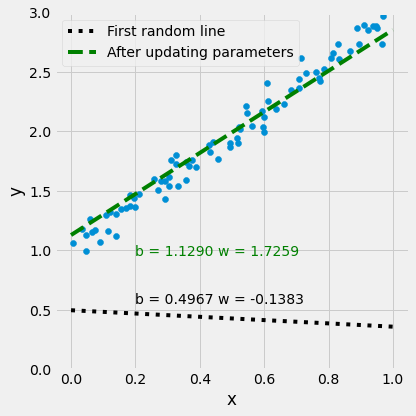

In [53]:
w = model.weight[0].detach().numpy()
w = np.reshape(w, (2, 1))
figure9(x_train, y_train, w[0], w[1])


به صورت مشابه می‌توان برازش انواع منحنی‌ها را داشت. به عنوان نمونه مثال و سایت زیر را ببینید:

<!--NAVIGATION-->
###  [More about optimization](App-Optimization.ipynb)

https://medium.com/@benjamin.phillips22/simple-regression-with-neural-networks-in-pytorch-313f06910379

<!--NAVIGATION-->
# < [Autograd](2_Autograd.ipynb) | Regression | [Digit-Classification-MLP](4_MLP_Digit_Classification.ipynb)>